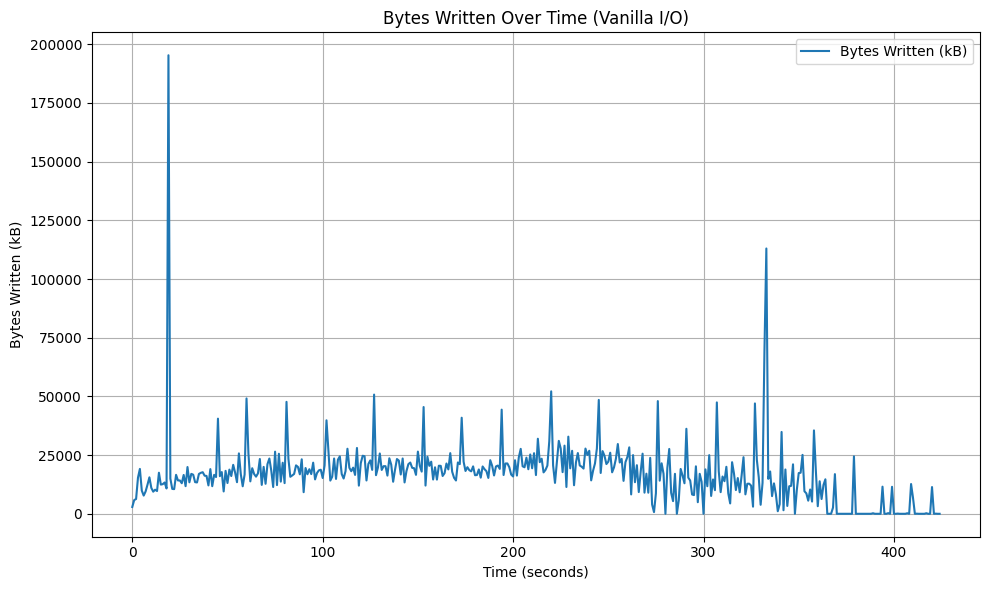

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

# Read the iostat output file
df = pd.read_csv('../van_io_iostat.txt', delim_whitespace=True, skiprows=3, header=None, names=[
    'r/s', 'rkB/s', 'rrqm/s', '%rrqm', 'r_await', 'rareq-sz', 'w/s', 'wkB/s', 'wrqm/s', '%wrqm', 'w_await', 'wareq-sz',
    'd/s', 'dkB/s', 'drqm/s', '%drqm', 'd_await', 'dareq-sz', 'aqu-sz', '%util'
])

df.reset_index(inplace=True)

# Plot Bytes Written over time (using row index as time)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['wkB/s'], label='Bytes Written (kB)', linestyle='-')
plt.title('Bytes Written Over Time (Vanilla I/O)')
plt.xlabel('Time (seconds)')
plt.ylabel('Bytes Written (kB)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


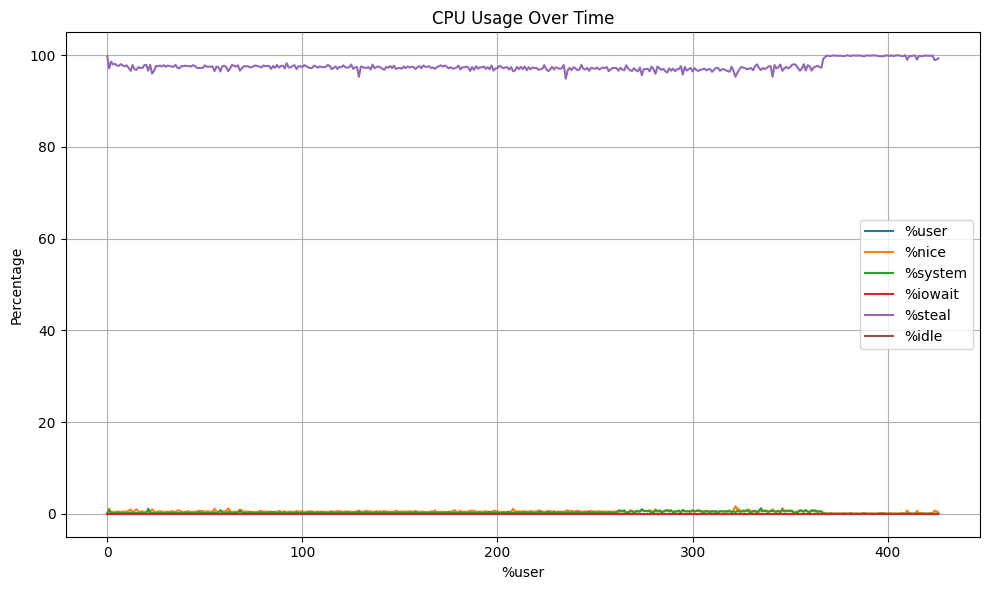

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO

df = pd.read_csv('../van_cpu_iostat.txt', delim_whitespace=True)

# Plot the columns
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:
    plt.plot(df.index, df[column], label=column)

plt.title('CPU Usage Over Time')
plt.xlabel('%user')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


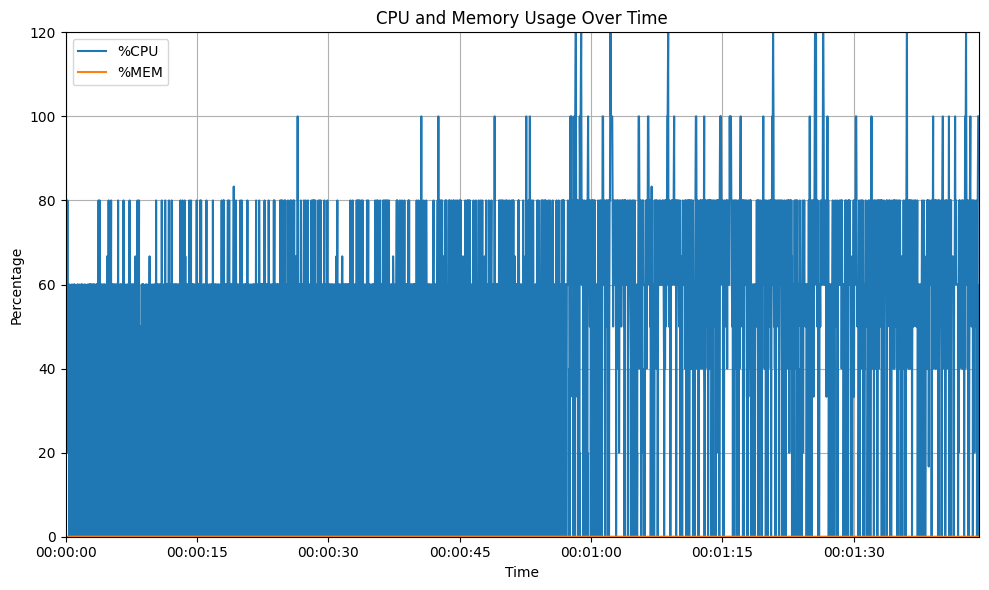

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Read the data from the file
df = pd.read_csv('../van_cpu_top.txt', delim_whitespace=True)

# Convert 'TIME' column to datetime for better plotting
df['TIME'] = pd.to_datetime(df['TIME+'], format='%M:%S.%f')

# Plot %CPU and %MEM over time
plt.figure(figsize=(10, 6))
plt.plot(df['TIME'], df['%CPU'], label='%CPU', linestyle='-')
plt.plot(df['TIME'], df['%MEM'], label='%MEM', linestyle='-')

plt.title('CPU and Memory Usage Over Time')
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 120)
plt.xlim(df['TIME'].min() - pd.Timedelta(milliseconds=100), df['TIME'].max() + pd.Timedelta(milliseconds=100))


# Show the plot
plt.show()


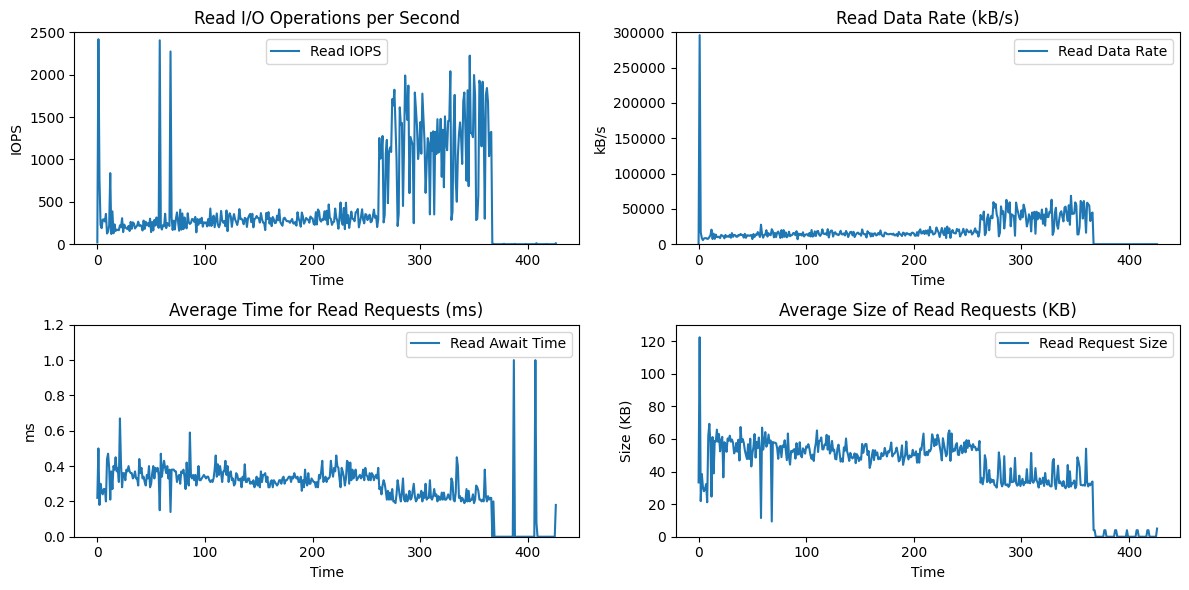

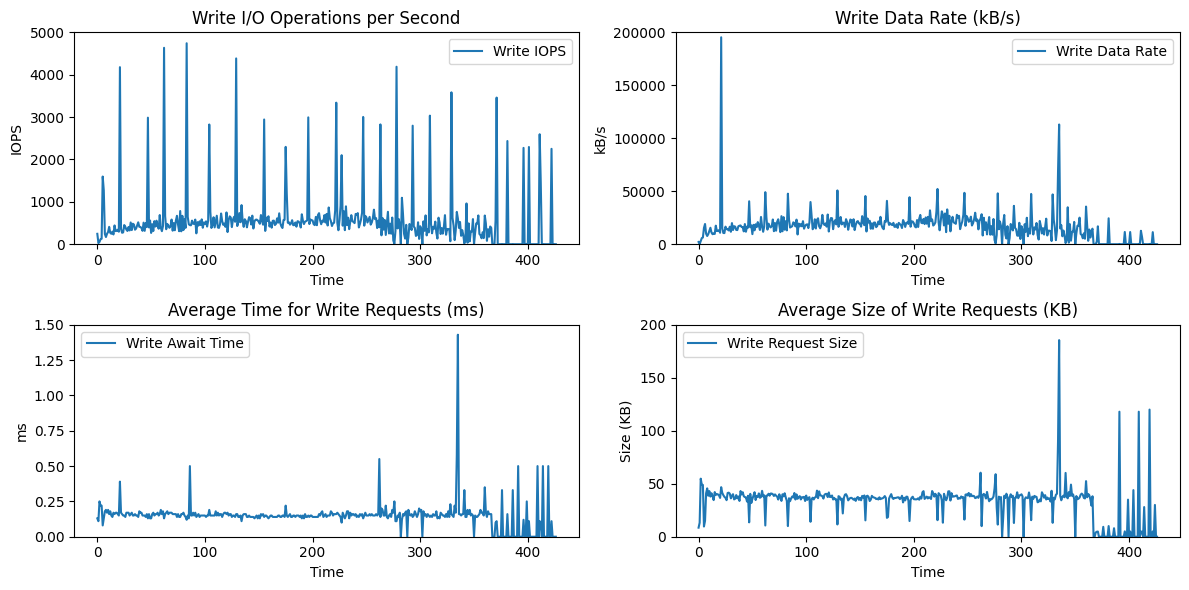

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a file named 'disk_stats.txt'
# Modify the filename accordingly
filename = '../van_io_iostat.txt'

# Read the data into a pandas DataFrame
df = pd.read_csv(filename, delim_whitespace=True)

# Plot read operations
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(df['r/s'], label='Read IOPS')
plt.title('Read I/O Operations per Second')
plt.xlabel('Time')
plt.ylabel('IOPS')
plt.ylim(0, 2500)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['rkB/s'], label='Read Data Rate')
plt.title('Read Data Rate (kB/s)')
plt.xlabel('Time')
plt.ylabel('kB/s')
plt.ylim(0, 300000)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['r_await'], label='Read Await Time')
plt.title('Average Time for Read Requests (ms)')
plt.xlabel('Time')
plt.ylabel('ms')
plt.ylim(0, 1.2)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df['rareq-sz'], label='Read Request Size')
plt.title('Average Size of Read Requests (KB)')
plt.xlabel('Time')
plt.ylabel('Size (KB)')
plt.ylim(0, 130)
plt.legend()

plt.tight_layout()
plt.show()

# Plot write operations
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(df['w/s'], label='Write IOPS')
plt.title('Write I/O Operations per Second')
plt.xlabel('Time')
plt.ylabel('IOPS')
plt.ylim(0, 5000)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(df['wkB/s'], label='Write Data Rate')
plt.title('Write Data Rate (kB/s)')
plt.xlabel('Time')
plt.ylabel('kB/s')
plt.ylim(0, 200000)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(df['w_await'], label='Write Await Time')
plt.title('Average Time for Write Requests (ms)')
plt.xlabel('Time')
plt.ylabel('ms')
plt.ylim(0, 1.5)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(df['wareq-sz'], label='Write Request Size')
plt.title('Average Size of Write Requests (KB)')
plt.xlabel('Time')
plt.ylabel('Size (KB)')
plt.ylim(0, 200)
plt.legend()

plt.tight_layout()
plt.show()
